# Tv shows and Movies listed on Netflix
We have a dataset from kaggle, which consists of Tv shows and Movies on Netflix as of 2019
We're gonna explore the dataset in this notebook
and we will try to answer these following questions

* Understanding what content is available in different countries
* Identifying similar content by matching text-based features
* Network analysis of Actors / Directors and find interesting insights
* Is Netflix has increasingly focusing on TV rather than movies in recent years.


In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading csv file and setting style
df= pd.read_csv('netflix_titles.csv',na_values=['nan'])
sns.set_style('darkgrid')

In [3]:
#taking a look at the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Understanding what contants available in different countries

In [4]:
df.rating.unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [5]:
df.rating.replace({
    'PG' : 'TV-PG',
    'G': 'TV-G',
    'NR' : np.NaN,
    'nan' : np.NaN,
},inplace=True)

In [6]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6006 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


we have to separate out the country. we have movies and tv shows which are available in different countries. so for conveniece we will add a row for every counties 

In [7]:
df1 = df.copy()

In [8]:
df1.country.dropna(inplace=True)

In [9]:
#creading a dictionary containing countries with how many times it was on the dataset
un_country = []
for coun in df1.country:
    tem_lists = coun.strip().split(',')
    for tem_list in tem_lists:
        tem_list.strip()
        if not tem_list.strip() in un_country:
            un_country.append(tem_list.strip())

In [10]:
un_dict = dict(df1.country.value_counts())

un_dict  

{'United States': 2032,
 'India': 777,
 'United Kingdom': 348,
 'Japan': 176,
 'Canada': 141,
 'South Korea': 136,
 'Spain': 117,
 'France': 90,
 'Mexico': 83,
 'Turkey': 79,
 'Australia': 71,
 'Taiwan': 69,
 'Hong Kong': 51,
 'Brazil': 50,
 'China': 50,
 'Egypt': 50,
 'Thailand': 50,
 'United Kingdom, United States': 50,
 'Philippines': 44,
 'Indonesia': 44,
 'Germany': 40,
 'United States, Canada': 39,
 'Argentina': 38,
 'Canada, United States': 36,
 'Nigeria': 36,
 'United States, United Kingdom': 32,
 'Colombia': 25,
 'France, Belgium': 24,
 'Italy': 22,
 'Pakistan': 18,
 'Malaysia': 17,
 'Hong Kong, China': 16,
 'China, Hong Kong': 15,
 'United States, Japan': 14,
 'Singapore': 14,
 'Israel': 13,
 'United States, Germany': 13,
 'Russia': 13,
 'Netherlands': 12,
 'Chile': 12,
 'Poland': 12,
 'Denmark': 12,
 'United States, Australia': 11,
 'Ireland': 11,
 'Mexico, United States': 10,
 'United States, Mexico': 9,
 'United States, France': 9,
 'Norway': 8,
 'New Zealand': 8,
 'United

In [11]:
mul_row = []
i = 0
for country in df1.country:
    newlist = country.split(',')
    if len(newlist) >1:
        for single in newlist:
            mul_row.append(pd.Series([df1.loc[i]['show_id'],df1.loc[i]['type'],df1.loc[i]['title'],df1.loc[i]['director'],df1.loc[i]['cast'],single.strip(),df1.loc[i]['date_added'],df1.loc[i]['release_year'],df1.loc[i]['rating'],df1.loc[i]['duration'],df1.loc[i]['listed_in'],df1.loc[i]['description']],index = df1.columns))
    i +=1

In [12]:
df1.append(mul_row,ignore_index = True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
8576,80115341,TV Show,Spy Kids: Mission Critical,NaN,"Ashley Bornancin, Carter Hastings, Caitlyn Bai...",Mexico,"November 30, 2018",2018,TV-Y7-FV,2 Seasons,Kids' TV,"In this animated spinoff series, Juni and Carm..."
8577,80115341,TV Show,Spy Kids: Mission Critical,NaN,"Ashley Bornancin, Carter Hastings, Caitlyn Bai...",United States,"November 30, 2018",2018,TV-Y7-FV,2 Seasons,Kids' TV,"In this animated spinoff series, Juni and Carm..."
8578,70264612,TV Show,The Magic School Bus,NaN,"Lily Tomlin, Daniel DeSanto, Erica Luttrell, M...",Cyprus,"November 19, 2014",1997,TV-Y,4 Seasons,Kids' TV,Join Ms. Frizzle as the Magic School Bus trave...
8579,70264612,TV Show,The Magic School Bus,NaN,"Lily Tomlin, Daniel DeSanto, Erica Luttrell, M...",Austria,"November 19, 2014",1997,TV-Y,4 Seasons,Kids' TV,Join Ms. Frizzle as the Magic School Bus trave...


In [13]:
#filtering all the rows which has more than one country
fin_df = df1[df['country'].isin(un_country)]

In [14]:
fin_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
...,...,...,...,...,...,...,...,...,...,...,...,...
6227,80005756,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NaN,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [15]:
fin_df.country.dropna(inplace=True)

/home/versu/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [16]:
#there is 111 countries. We cannot observe every one of them so we just drop all those rows which has a country with less than 10 movies
filtered = []
for filt_name,filt_count in dict(fin_df.country.value_counts()).items():
    if filt_count>10:
        filtered.append(filt_name)
fin_df = fin_df[fin_df['country'].isin(filtered)]

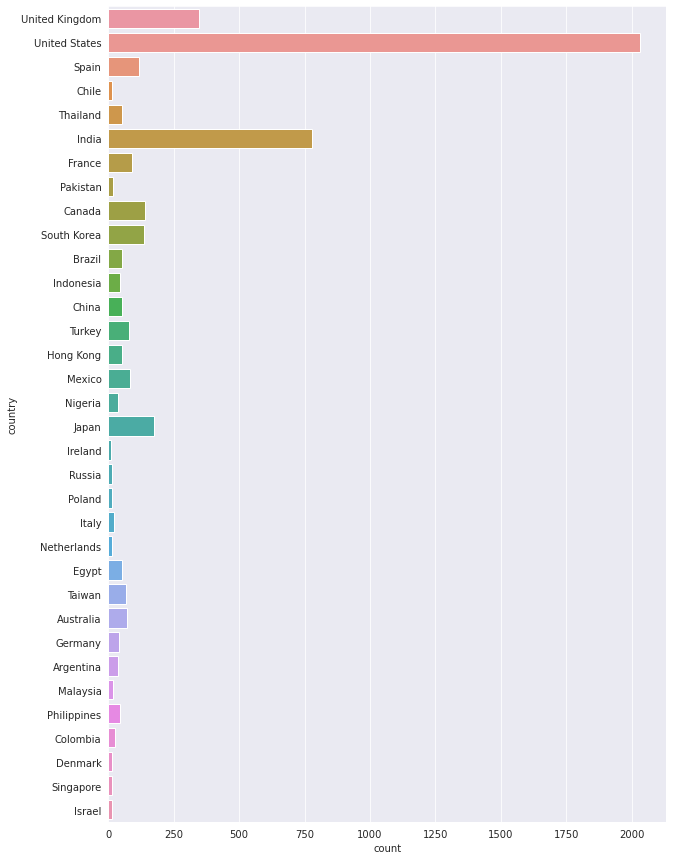

In [17]:
plt.rcParams['figure.figsize'] = (10,15)
sns.countplot(y='country',data=fin_df,orient='horizontal')

we see US has biggest amount of movies and tv shows than other countries which we can say even before seeing the graph.
As US, UK, India, Japan have noticable moveis/Tv shows in Netflix according to the dataset, we will try to understand what types of contents these countries have.

In [18]:
#separating every single movie/tv show type 
un_content = []
for i in fin_df.listed_in.unique():
    if len(i.split(','))>1:
        for j in i.split(','):
            if j.strip() not in un_content:
                un_content.append(j.strip())
    else:
        if i.strip() not in un_content:
            un_content.append(i.strip())

In [19]:
len(un_content)
un_content.remove('Movies')

In [20]:
us_listed = fin_df[fin_df['listed_in'].isin(un_content)]

In [21]:
us_listed

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6192,80199128,TV Show,Kim's Convenience,NaN,"Paul Sun-Hyung Lee, Jean Yoon, Andrea Bang, Si...",Canada,"April 3, 2019",2019,TV-14,3 Seasons,TV Comedies,"While running a convenience store in Toronto, ..."
6216,80108373,TV Show,The Magic School Bus Rides Again,NaN,"Kate McKinnon, Miles Koseleci-Vieira, Mikaela ...",United States,"April 13, 2018",2018,TV-Y,2 Seasons,Kids' TV,Ms. Frizzle's kid sister Fiona takes the wheel...
6220,70272742,TV Show,Justin Time,NaN,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


In [22]:
def logical(data,logic):
    for i in un_content:
        counting = 0
        for j in data['listed_in']:
            if i in j:
                counting +=1
        logic.append(counting)

In [23]:
#for US
us_df = fin_df[fin_df['country'] == 'United States']
us_count = []
logical(us_df,us_count)

<BarContainer object of 41 artists>

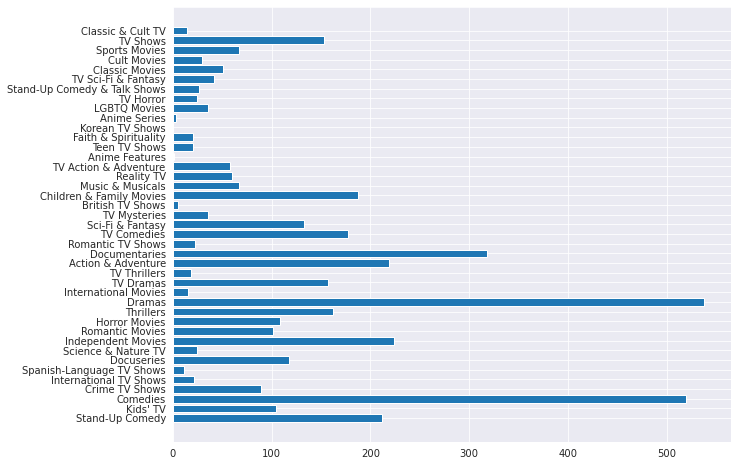

In [24]:
plt.rcParams['figure.figsize'] = (10,8)
plt.barh(un_content,us_count)

Dramas and Comedy movies or tv shows are most favouring type in US. as we can see from the bar graph

<BarContainer object of 41 artists>

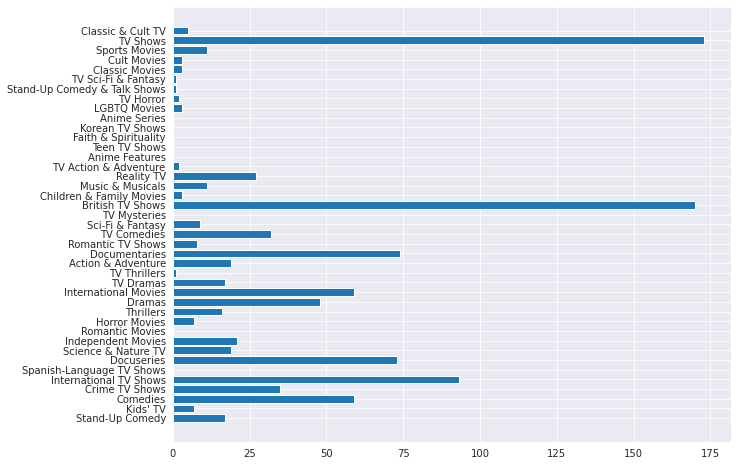

In [25]:
#for UK
uk_df = fin_df[fin_df['country']=='United Kingdom']
uk_count = []
logical(uk_df,uk_count)
plt.barh(un_content,uk_count)

TV shows and Bristish Tv shows are most popular in UK. Bristish tv shows are really good and popular all over the world

<BarContainer object of 41 artists>

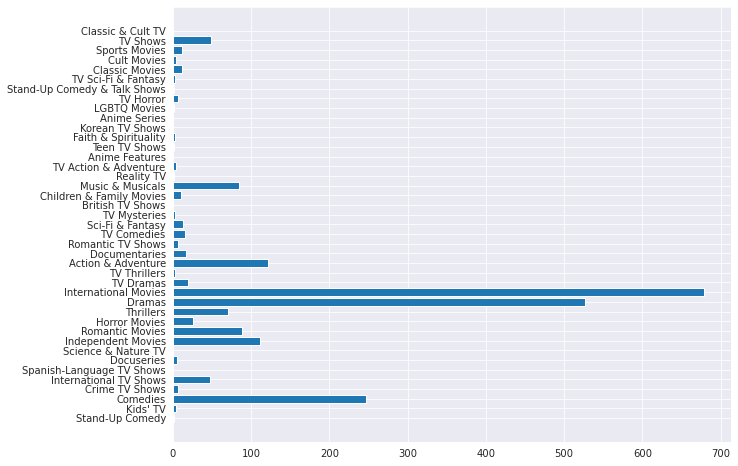

In [26]:
#for india
ind_df = fin_df[fin_df['country'] == 'India']
ind_count = []
logical(ind_df,ind_count)
plt.barh(un_content,ind_count)

In India, International movies and Dramas are very popular than other type of movies or tv shows

<BarContainer object of 41 artists>

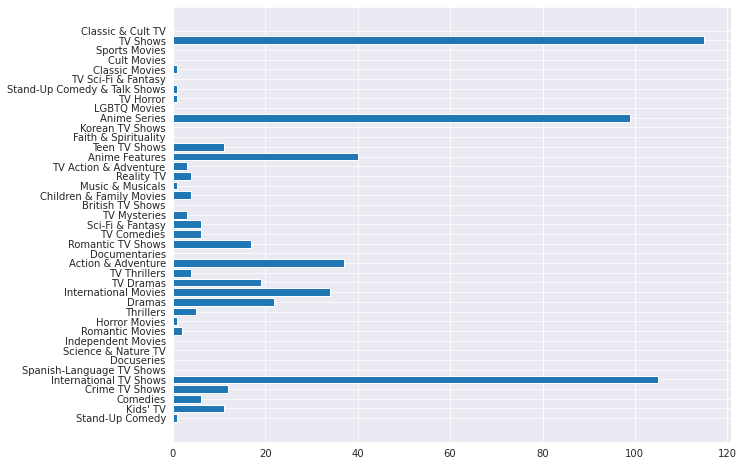

In [27]:
#for Japan
jp_df = fin_df[fin_df['country'] == 'Japan']
jp_count = []
logical(jp_df,jp_count)
plt.barh(un_content,jp_count)

In Japan, biggest amount of netflix shows are occupied with International tv shows, tv shows and of course Anime series

# Network Analysis on casts
we will see top tv shows and movie actor/actress in Netflix

In [28]:
cast_df = df.copy()
cast_df = cast_df.drop(['director','country','date_added','release_year','rating'],axis=1)
cast_df.dropna(inplace=True)
#defining fuction that will return a dictionary containg with the actor name and the amount of movies/tv shows done by him/her.
def tv_movie(sep_df,sep_cast,cast_count):
    for i in sep_df['cast']:
        for j in i.strip().split(', '):
            if j.strip() not in sep_cast:
                sep_cast.append(j.strip())
    for i in sep_cast:
        c = 0
        for j in sep_df.cast:
            if i in j.split(','):
                c+=1
        cast_count[i] = c

In [29]:
tv_df = cast_df[cast_df['type']=='TV Show']
tv_cast = []
tv_cast_count = {}
tv_movie(tv_df,tv_cast,tv_cast_count)
len(tv_cast)

11443

In [30]:
movie_df = cast_df[cast_df['type'] == 'Movie']
movie_cast = []
movie_cast_count = {}
tv_movie(movie_df,movie_cast,movie_cast_count)
len(movie_cast)

18860

In [31]:
#sorting out the dictionary according to the amount of movies/tv shows
import operator
movie_cast_count = sorted(movie_cast_count.items(),key=operator.itemgetter(1))
tv_cast_count = sorted(tv_cast_count.items(),key= operator.itemgetter(1))

In [32]:
movie_actor = []
movie_actor_num = []
z=0
for i, j in movie_cast_count[::-1]:
    if z == 40:
        break
    movie_actor.append(i)
    movie_actor_num.append(j)
    z+=1

<BarContainer object of 40 artists>

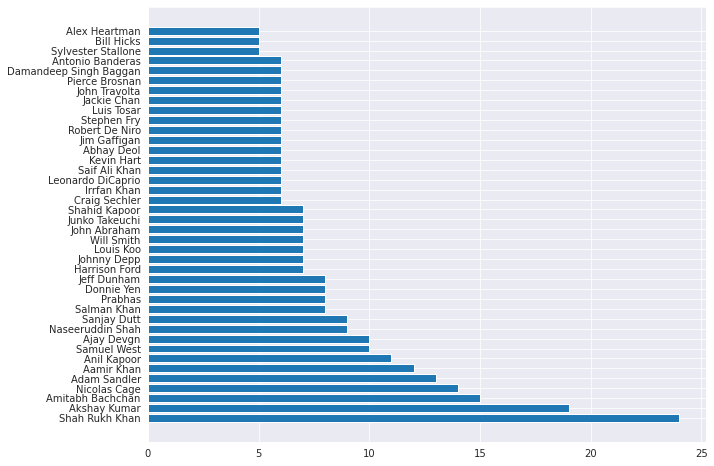

In [33]:
plt.barh(movie_actor,movie_actor_num)

In [34]:
tv_actor = []
tv_actor_num = []
z=0
for i, j in tv_cast_count[::-1]:
    if z == 40:
        break
    tv_actor.append(i)
    tv_actor_num.append(j)
    z+=1

<BarContainer object of 40 artists>

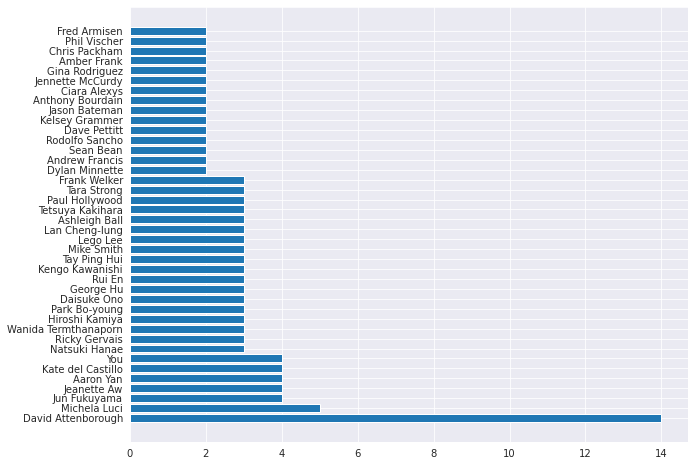

In [35]:
plt.barh(tv_actor,tv_actor_num)

In [36]:
tv_movie_ratio = df[['type','release_year']]

In [37]:
tv_movie_ratio.dropna()

,type,release_year
0,Movie,2019
1,Movie,2016
2,TV Show,2013
3,TV Show,2016
4,Movie,2017
...,...,...
6229,TV Show,2015
6230,TV Show,2016
6231,Movie,2016
6232,TV Show,2013


In [38]:
plt.rcParams['figure.figsize'] = (20,6)


In [39]:
def sucks(x):
    if x =='Movie':
        return 'yes'
def same(x):
    if x =='TV Show':
        return 'yes'
tv_movie_ratio['movie'] = tv_movie_ratio.type.apply(sucks)
tv_movie_ratio['tv'] = tv_movie_ratio.type.apply(same)
tv_movie_know = tv_movie_ratio.groupby('release_year',as_index=False).count()
tv_movie_know['movie_ratio'] = (tv_movie_know['movie']/(tv_movie_know['movie']+tv_movie_know['tv']))*100
tv_movie_know['tv_ratio'] = 100-tv_movie_know['movie_ratio']
tv_movie_know

<ipython-input-39-c73d521852ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_movie_ratio['movie'] = tv_movie_ratio.type.apply(sucks)
<ipython-input-39-c73d521852ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_movie_ratio['tv'] = tv_movie_ratio.type.apply(same)


,release_year,type,movie,tv,movie_ratio,tv_ratio
0,1925,1,0,1,0.000000,100.000000
1,1942,2,2,0,100.000000,0.000000
2,1943,3,3,0,100.000000,0.000000
3,1944,3,3,0,100.000000,0.000000
4,1945,3,3,0,100.000000,0.000000
...,...,...,...,...,...,...
67,2016,830,593,237,71.445783,28.554217
68,2017,959,682,277,71.115746,28.884254
69,2018,1063,646,417,60.771402,39.228598
70,2019,843,400,443,47.449585,52.550415


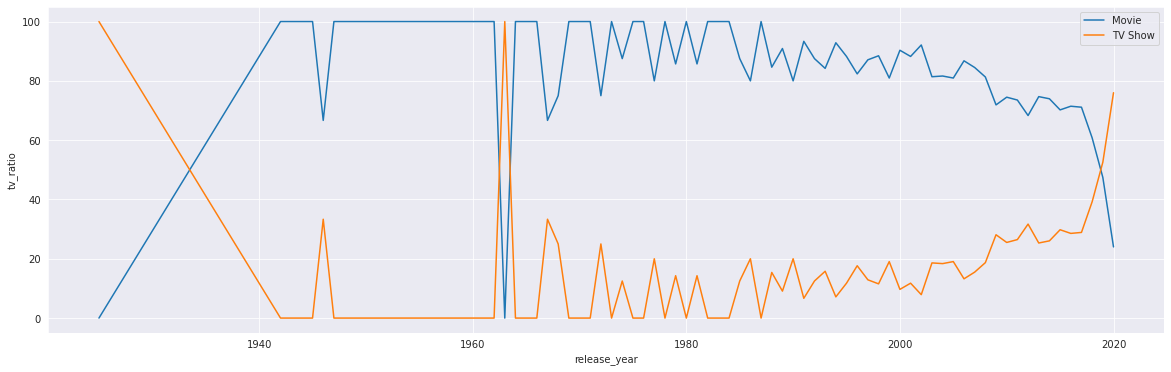

In [40]:
sns.lineplot('release_year','movie_ratio',data=tv_movie_know,label='Movie')
sns.lineplot('release_year','tv_ratio',data=tv_movie_know,label='TV Show')

As of 2020, we can see Netflix is focusing on Tv shows than Movies. we see the ratio of tv shows was increasing year by year and before 2020 it crossed the ratio of movies.

In [41]:
df[df['type'] == 'TV Show']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NaN,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [42]:
for i in tv_df.cast:
    print(i)
    for j in i.split(','):
        print(j)
    break

Peter Cullen, Sumalee Montano, Frank Welker, Jeffrey Combs, Kevin Michael Richardson, Tania Gunadi, Josh Keaton, Steve Blum, Andy Pessoa, Ernie Hudson, Daran Norris, Will Friedle
Peter Cullen
 Sumalee Montano
 Frank Welker
 Jeffrey Combs
 Kevin Michael Richardson
 Tania Gunadi
 Josh Keaton
 Steve Blum
 Andy Pessoa
 Ernie Hudson
 Daran Norris
 Will Friedle


In [43]:
x = ['mx','kdd','masud','bha']
if 'kddm' in x:
    print(True)